# Data Exploration and Cleaning

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
housing_train = pd.read_csv('train.csv')
housing_test = pd.read_csv('test.csv')


housing_train = housing_train[housing_train['GrLivArea']<3000]
housing_train = housing_train[housing_train['SalePrice']<600000]

In [3]:
all_data = pd.concat([housing_train,housing_test])
all_data.shape

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2900, 81)

In [4]:
def explore_data(dframe):
    edd = pd.DataFrame(index=dframe.columns)
     
    edd['Data_type'] = dframe.dtypes
    edd['Record_count'] = len(dframe)
    edd['Null_count'] = dframe.isna().sum()
    edd['null_pct'] = edd['Null_count']/edd['Record_count']*100
    edd['Unique_values'] = dframe.nunique()
    edd['Min_value'] = dframe.min()
    edd['Max_value'] = dframe.max()
    edd['Mode_value'] = dframe.mode().iloc[0]
    edd.to_excel('edd_final_data.xlsx')
    return edd

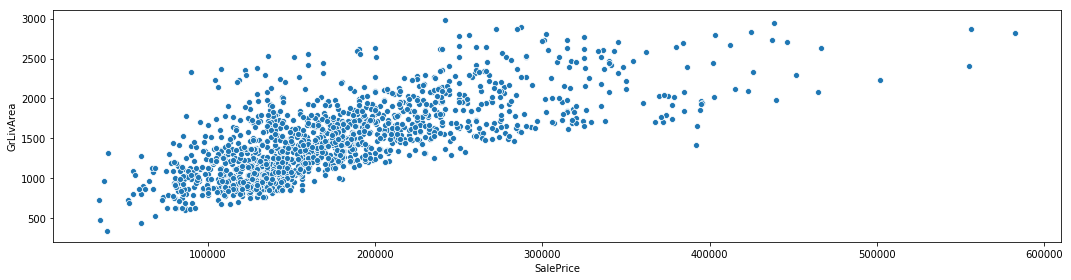

In [5]:
plt.figure(figsize=(15,4))
sns.scatterplot(housing_train['SalePrice'],housing_train['GrLivArea'])
plt.tight_layout()

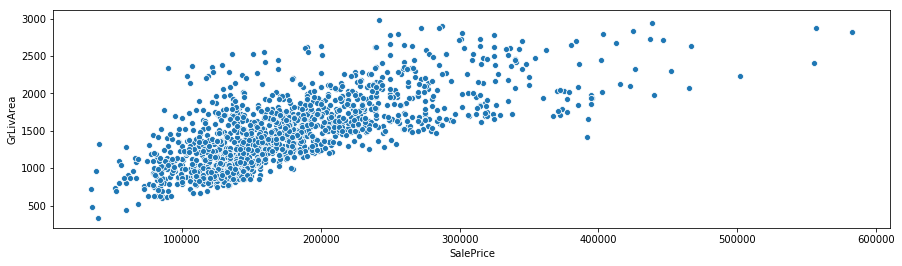

In [6]:
plt.figure(figsize=(15,4))
sns.scatterplot(all_data['SalePrice'],all_data['GrLivArea'])

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


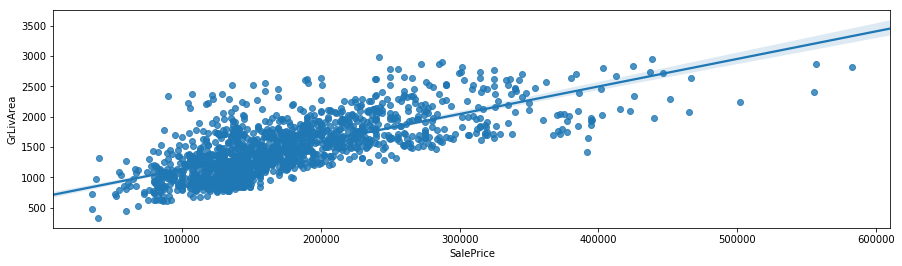

In [7]:
plt.figure(figsize=(15,4))
sns.regplot(all_data['SalePrice'],all_data['GrLivArea'])

In [8]:
all_data_edd = explore_data(all_data)

In [9]:
all_data_edd.sort_values(by='null_pct',ascending=False)

,Data_type,Record_count,Null_count,null_pct,Unique_values,Min_value,Max_value,Mode_value
PoolQC,object,2900,2893,99.758621,3,NaN,NaN,Gd
MiscFeature,object,2900,2795,96.379310,4,NaN,NaN,Shed
Alley,object,2900,2703,93.206897,2,NaN,NaN,Grvl
Fence,object,2900,2334,80.482759,4,NaN,NaN,MnPrv
SalePrice,float64,2900,1459,50.310345,650,34900,582933,140000
FireplaceQu,object,2900,1419,48.931034,5,NaN,NaN,Gd
LotFrontage,float64,2900,484,16.689655,127,21,313,60
GarageQual,object,2900,157,5.413793,5,NaN,NaN,TA
GarageFinish,object,2900,157,5.413793,3,NaN,NaN,Unf
GarageCond,object,2900,157,5.413793,5,NaN,NaN,TA


# Feature Engineering

In [10]:
all_data['PoolQC'].fillna('none',inplace=True)
all_data['MiscFeature'].fillna('none',inplace=True)
all_data['Alley'].fillna('none',inplace=True)
all_data['Fence'].fillna('none',inplace=True)
all_data['FireplaceQu'].fillna('none',inplace=True)
all_data['GarageType'].fillna('none',inplace=True)
all_data['GarageFinish'].fillna('none',inplace=True)
all_data['GarageQual'].fillna('none',inplace=True)
all_data['GarageCond'].fillna('none',inplace=True)

In [11]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [12]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [13]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [14]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [15]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [16]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [17]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [18]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [19]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [20]:
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

In [21]:
all_data_edd = explore_data(all_data)
all_data_edd.sort_values(by='null_pct',ascending=False)

,Data_type,Record_count,Null_count,null_pct,Unique_values,Min_value,Max_value,Mode_value
SalePrice,float64,2900,1459,50.310345,650,34900,582933,140000
1stFlrSF,int64,2900,0,0.000000,1073,334,5095,864
Neighborhood,object,2900,0,0.000000,25,Blmngtn,Veenker,NAmes
MiscVal,int64,2900,0,0.000000,38,0,17000,0
MiscFeature,object,2900,0,0.000000,5,Gar2,none,none
MasVnrType,object,2900,0,0.000000,4,BrkCmn,Stone,None
MasVnrArea,float64,2900,0,0.000000,436,0,1600,0
MSZoning,object,2900,0,0.000000,5,C (all),RM,RL
MSSubClass,int64,2900,0,0.000000,16,20,190,20
LowQualFinSF,int64,2900,0,0.000000,31,0,1064,0


In [22]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [23]:
#Label encoding categorical variables 

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

from sklearn.preprocessing import LabelEncoder

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c]))
    all_data[c] = lbl.transform(list(all_data[c]))

Lets check for skewness of continuous variables

In [24]:
numerics = all_data.dtypes[all_data.dtypes!=object].index.to_list()

from scipy.stats import skew

skewed_feats = pd.DataFrame(all_data[numerics].apply(lambda x:skew(x)),columns=['skewness'])

highly_skewed = skewed_feats[abs(skewed_feats['skewness'])>3]
print ('There are {} features which has skewness >0.75'.format(len(highly_skewed)))

There are 20 features which has skewness >0.75


In [25]:
for i in highly_skewed.index.to_list():
    all_data[i] =  np.log1p(all_data[i])

In [26]:
skewed_feats = pd.DataFrame(all_data[numerics].apply(lambda x:skew(x)),columns=['skewness'])

df = all_data[all_data.dtypes[all_data.dtypes == object].index.to_list()]
explore_data(df)

all_data.drop(['Condition1','Condition2','Exterior1st','Exterior2nd','HouseStyle','Neighborhood','SaleType'],axis=1,inplace=True)

In [27]:
#Getting dummies for categorical variables

data_for_model = pd.get_dummies(all_data)

In [28]:
data_for_model.shape

(2900, 133)

In [29]:
data_for_model.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,Id,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0.0,1.098612,3,4,3,706.0,0.0,2,1.94591,1.0,0.000000,2,150.0,0.693147,0.000000,4,2,4,5,0,2,1.94591,548.0,2.0,1.609438,1,1.609438,7.602900,1710,1,0,1,0.693147,2,0.0,9.042040,65.0,3,0.0,10,196.0,0.0,4,61,4,7,2,0.0,1.386294,208500.0,0.0,0.693147,8,856.0,0,2003,2003,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,1262,0,0.0,1.098612,3,4,1,978.0,0.0,0,1.94591,0.0,0.693147,2,284.0,0.693147,0.000000,4,3,4,4,1,2,1.94591,460.0,2.0,1.609438,1,1.609438,7.589336,1262,0,0,2,0.693147,3,0.0,9.169623,80.0,3,0.0,5,0.0,0.0,7,0,7,6,2,0.0,1.386294,181500.0,0.0,0.693147,6,1262.0,298,1976,1976,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,920,866,0.0,1.098612,3,4,2,486.0,0.0,2,1.94591,1.0,0.000000,2,434.0,0.693147,0.000000,4,2,4,4,1,2,1.94591,608.0,2.0,1.609438,1,1.609438,7.601902,1786,1,0,3,0.693147,2,0.0,9.328212,68.0,0,0.0,10,162.0,0.0,11,42,4,7,2,0.0,1.386294,223500.0,0.0,0.693147,6,920.0,0,2001,2002,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,961,756,0.0,1.098612,3,1,3,216.0,0.0,0,1.94591,1.0,0.000000,4,540.0,0.693147,5.609472,4,3,4,2,1,1,1.94591,642.0,3.0,1.609438,2,1.609438,7.600402,1717,0,2,4,0.693147,2,0.0,9.164401,60.0,0,0.0,11,0.0,0.0,4,35,4,7,2,0.0,1.386294,140000.0,0.0,0.693147,7,756.0,0,1915,1970,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,1145,1053,0.0,1.098612,4,4,0,655.0,0.0,2,1.94591,1.0,0.000000,2,490.0,0.693147,0.000000,4,2,4,4,1,2,1.94591,836.0,3.0,1.609438,1,1.609438,7.601402,2198,1,0,5,0.693147,2,0.0,9.565284,84.0,0,0.0,10,350.0,0.0,3,84,4,8,2,0.0,1.386294,250000.0,0.0,0.693147,9,1145.0,192,2000,2000,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


Now we have a dataset which is cleaned, we should follow the below steps to apply Linear regression to predict SalePrice of houses

# Step 1: Find out if there exists a Linear Relationship between Y and X

We need to find out if at all there exists a linear relationship between dependent variable (Saleprice) and independent variable
For this we do a hypothesis testing

* H(0)(Null Hypothesis): B1,B2,....Bn =0 , hence there is no relationship between Y(dependent Variable), and predictors

* H(A) (Alternate hypothesis): There exists a linear relationship between Y(Dependent Variable), and predictors





* Conclusion:
    We conclude this hypothesis using p-value of F-statistic, if it is close to 1, then there is no relationship between y and x.
    Else we reject the null hypothesis

* In the below case, we see prob((F-statistic): 0.00, this means this is not by chance and there exists a relationship between Y and X.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data_for_model[:1441].drop('SalePrice',axis=1)
y = data_for_model[:1441]['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     89.31
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:29:20   Log-Likelihood:                -10915.
No. Observations:                 965   AIC:                         2.206e+04
Df Residuals:                     849   BIC:                         2.263e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
1stFlrSF                -33.68

* Sseeing the above table, P-value (for the F-statistic) is 0.00, we are sure that atleast 1 variable is related linearly to the predictor

* Also we have a lot of features, which might not be helpful in predicting the house price. We need to figure out which variables are important to predict house prices

# Step 2: Find out variable importance (Variable Selection)

Here we rely on the concept of p-value for variable. variable with high p value are not relevant in predicting the response.
Following are the methods for variable selection using p-value criteria
* Forward Selection
* Backward Selection
* Mixed Selection

* Forward Selection - 
    we start with a model with only intercept value and fit a variable which results in lowest RSS in the regression model. Further we continue to add variable to the regression model which gives lowest RSS. we continue to do until some stopping rule is specified
    
* Backward Selection - we start with all the variables in the model, and then reduced the variables with hightest p value(least significant variable). We again start with remaining variables, fit the model and remove least significant variable

* Mixed Selection - we start with no variables in the model, add varible in the model which provides lowest RSE, if not we go backwards and remove the variable. This process of going forward and backward is called Mixed Selection

* Note - Backward selection cannot be used if number of variable > number of records

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data_for_model[:1441].drop('SalePrice',axis=1)
y = data_for_model[:1441]['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
predictions = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
rsq = r2_score(y_test,predictions)


print ('MAE:{}'.format(MAE))
print ('MSE:{}'.format(MSE))
print ('rsquare:{}'.format(rsq))

MAE:17972.082840857947
MSE:698370354.3160175
rsquare:0.8767340812058574


In [66]:
#This is what we predicted using simple linear regression. 
#we will try to reduced MAE, MSE by using various techniques
results = pd.DataFrame(predictions,columns=['Predictions'])
results['actual'] = y_test.to_list()
#results



# Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

In [104]:
alpha=0.60

model_ridge = Ridge(alpha=alpha,normalize=True)
model_ridge.fit(X_train,y_train)

Ridge(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [105]:
pred_ridge = model_ridge.predict(X_test)

In [106]:
MAE = mean_absolute_error(y_test,pred_ridge)
MSE = mean_squared_error(y_test,pred_ridge)
rsq = r2_score(y_test,pred_ridge)


print ('MAE:{}'.format(MAE))
print ('MSE:{}'.format(MSE))
print ('R-square:{}'.format(rsq))

MAE:17615.542847718418
MSE:747120601.1290747
R-square:0.8681294147452684


# Lasso Regression

In [107]:
from sklearn.linear_model import Lasso

In [108]:
model_lasso = Lasso(alpha=1,normalize=True)
model_lasso.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [111]:
pred_lasso = model_lasso.predict(X_test)

In [112]:
MAE = mean_absolute_error(y_test,pred_lasso)
MSE = mean_squared_error(y_test,pred_lasso)
rsq = r2_score(y_test,pred_lasso)


print ('MAE:{}'.format(MAE))
print ('MSE:{}'.format(MSE))
print ('R-square:{}'.format(rsq))

MAE:17900.55900771279
MSE:694226125.6167902
R-square:0.8774655586449358


In [123]:
coff = pd.DataFrame(model_lasso.coef_,columns=['Coefficient'])
coff['var'] = X_test.columns
coff.sort_values(by='Coefficient',ascending=False)

,Coefficient,var
50,1e+05,PoolQC
52,3.4e+04,Street
130,3e+04,Utilities_AllPub
72,2.7e+04,Foundation_Slab
82,2.6e+04,Heating_Floor
123,2.1e+04,RoofStyle_Shed
125,2e+04,SaleCondition_AdjLand
23,1.8e+04,Functional
73,1.7e+04,Foundation_Stone
108,1.6e+04,MiscFeature_Shed


# Step 3: Model Fit

Numerical measures of accessing model fit are

* RSE
* R Square statistic

RSE: provides average error by which predicted value will vary from actual value.
Disadvantage of RSE is that ,it is in number of units of predicted variable and does not provide an absolute number about error

R square : is the correlation of predicted (Y) and actual (Y)


if predicted (Y) and actual(Y) are higly correlated, then model is able to explain large amount of variance